In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [0.0, 1.0]}
a_space = {'1': [0.0, 1.0]}

param_prior = {
    'distribution':'uniform'
    }
param_util = {
    'payment_rule': 'first_price', 
    'tie_breaking': 'lose', 
    'risk':1.0
    }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)



**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(1e4)
tol = 1e-6
stop_criterion = 'util_loss'
regularizer = 'euclidean'
steprule_bool = True
eta = 10
beta = 1/20

learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion, 'online', steprule_bool, eta, beta)

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

  1%|                    | 57.0/10.0k [00:00<00:07, 1.37kit/s]

Convergence after 57 iterations
Value of stopping criterion (util_loss) 0.0


In [5]:
len(strategies['1'].history), len(strategies['1'].utility)

(58, 58)

Visualization of the learning process and the final result

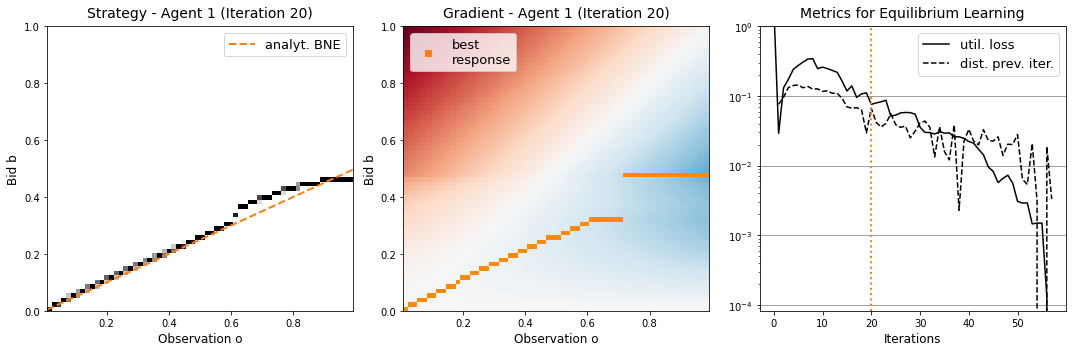

In [6]:
strategies['1'].plot(grad=True, metrics=True, beta=lambda x: 0.5*x, iter=20)